# Förster Resonance Energy Transfer (FRET)
## Brandon Cohen
### May 8, 2023


## Purpose
The purpose of this lab is to use various experimental and theoretical techniques to determine the free energy of protein unfolding, the Förster energy transfer with the use of fluorescence quenching, and the intramolecular distances for partially and fully folded proteins.

## Introduction

Proteins are fundamental to all living organisms as they are one of the most essential building blocks for sustaining life. Without the influence of proteins, no biochemical process will occur. While a lot of research has shed light on the structure and function of different types of proteins, there is still a lack of understanding in the study of proteins. It is well understood that the structure and function of proteins are kinetically and thermodynamically controlled, but there is not enough information to predict the structure and folding of proteins based on the amino acid sequence. In recent years, advances in biophysical techniques have paved way for studying protein folding and unfolding. In this paper, a multifaceted approach is used to study the structural changes and thermodynamics of the folding/unfolding of cytochrome c (cyt c) using a UV-Vis (absorption), spectrofluorometer (fluorescence), and Förster resonance energy transfer (FRET) techniques. Cytochrome c is an electron transfer protein that is perfect for studying the biophysical charcteristics of proteins due to the extensive research that has gone into cyt c. Urea, a known denaturant, was used to denature cytochome c generating an unfolding curve based on urea concentration. N-acetyl-tryptophanamide (NATA) is a tryptophan model compound that was measured using a UV-Vis and spectrofluorometer to measure the Förster distance of the trp–heme pair.

# Methods

A stock solution of 20 mM pH 7.4 phosphate (KPi) buffer, 10.0 M urea dissolved in KPi, and 500 mM of cyt c dissolved in KPi were created. 10 samples consisting of 0M-10M urea solutions and ∼10 µm cyt c was created in 1.5 mL samples and then an emission spectrum was measured at 𝜆ₑₓ=290 nm with a spectrofluorometer and an absorption spectrum was measured with a UV-Vis instrument. Additional samples consisting of KPi, KPi/cyt c (no urea), and KPi/10M urea (no cyt c) were also measured. To create the unfolding curve, the 0M-10M urea samples (Spectrum A) were subtracted by the KPi (Spectrum B) to get a corrected spectrum which was then normalized by the maximum absorption value and ploted as a function of urea concentration (Part A). NATA was used to measure the Förster distance by calculating integrated areas (Part B). The Förster distance, R₀, was calculated using a theoretical function of energy transfer efficiency, E, vs. simulated radii distances. Then, the distance between Trp-59 and the heme cofactor was determined as a funciton of urea concentration (Part C).

# Setup

## Library import
We import all the required Python libraries

In [44]:
# File handling
from pathlib import Path
from shutil import unpack_archive
import re

# Data manipulation
import numpy as np
import scipy as sp
import pandas as pd

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.despine()

# Used to print a statment in the middle
from IPython.core.display import display, HTML
def centered(content):
    display(HTML(f"<div style='text-align:center'>{content}</div>"))

<Figure size 432x288 with 0 Axes>

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

#### IMPORTANT DATAFRAMES for Fluorescence:
new_raw_fluor
<br>NATA_fluor
<br>modified_fluor_spec
<br>normalized_spectra

#### IMPORTANT DATAFRAMES for Absorbance:
abs_spectra
<br>NATA_abs

# Data import
We retrieve all the required data for the analysis.

##### Reading in old spectra

#### Reading in Better Spectra and Modifying It

In [45]:
filename = Path("fret_fluor" + ".zip") # fill in the name of the file without the ZIP extension
dest_folder = Path("F") # fill in a name for a subfolder in which to place the text files
unpack_archive(filename, dest_folder)

all_files = list(dest_folder.glob("*.TXT"))

li = [] # Create an empty list to hold the contents of our assorted files
# Import each file in order
# Skip first 31 rows, as data doesn't start until line 32
# Set first (0-th) column (nm) as index
# Default file from fluorometer uses tabs (\t) for separators
for file in all_files:
    df1 = pd.read_csv(file, skiprows=31, index_col=0, sep='\t') 
    li.append(df1)

cols = []
new_raw_fluor = pd.concat(li, axis=1) # Use `axis=1` to turn rows of list into columns of dataframe
for file in all_files:
    print(file) # List filenames so we can figure out our column naming in the next step. 
    cols.append(str(file).split('/')[-1].split('(')[0])
    
new_raw_fluor.columns = cols
new_raw_fluor = new_raw_fluor[['kpiNOcyt2', 'UreaM0', 'UreaM1', 
        'UreaM2', 'UreaM3', 'UreaM4', 'UreaM5', 
        'UreaM6', 'UreaM7', 'UreaM8', 'UreaM9', 
        'UreaM10','UreaNoCyt', 'NATA']]

# Dropped the fluoresence data because it is not good
new_raw_fluor = new_raw_fluor.drop('NATA', axis=1)

F/UreaM8(FDS).TXT
F/UreaM3(FDS).TXT
F/UreaM4(FDS).TXT
F/UreaM9(FDS).TXT
F/UreaM6(FDS).TXT
F/NATA(FDS).TXT
F/UreaM1(FDS).TXT
F/UreaM2(FDS).TXT
F/UreaNoCyt(FDS).TXT
F/UreaM10(FDS).TXT
F/UreaM5(FDS).TXT
F/UreaM0(FDS).TXT
F/UreaM7(FDS).TXT
F/kpiNOcyt2(FDS).TXT


In [46]:
NATA_fluor = pd.read_csv('nata_fluor.txt', sep='\t', skiprows= 27)
NATA_fluor.columns = ['Wavelength (nm)', 'Intensity']
NATA_fluor.index = NATA_fluor.pop('Wavelength (nm)')

<h3 align="center"> Plot the Good Data: Unmodified and Modified Fluorescence Spectrum </h3> 

In [47]:
centered('Table 1. Unmodified Fluoresence Data')
new_raw_fluor.head()

,kpiNOcyt2,UreaM0,UreaM1,UreaM2,UreaM3,UreaM4,UreaM5,UreaM6,UreaM7,UreaM8,UreaM9,UreaM10,UreaNoCyt
nm,,,,,,,,,,,,,
300.0,5.292,9.937,9.309,7.937,11.320,17.990,11.340,14.530,11.630,20.25,19.11,25.42,10.100
300.5,4.479,9.052,8.524,7.119,10.260,16.050,10.180,12.740,10.370,18.29,18.09,24.63,9.190
301.0,3.311,7.939,7.551,5.983,8.657,13.260,8.659,10.350,8.634,15.41,16.56,23.55,7.943
301.5,2.386,7.102,6.792,5.124,7.316,10.980,7.486,8.427,7.374,13.17,15.45,22.93,7.002
302.0,1.764,6.641,6.251,4.619,6.473,9.591,6.771,7.204,6.576,11.88,14.74,22.70,6.356


In [48]:
# Spectrum A (UreaM) - Spectrum B (KPi)
modified_fluor_spec = new_raw_fluor.copy()
for i in range (2, 12):
    modified_fluor_spec.iloc[:, i] = modified_fluor_spec.iloc[:, i].sub(modified_fluor_spec.iloc[:, 0])

centered("Table 2. Modified Spectrum (Spectrum A - Spectrum B)")
modified_fluor_spec.head()

,kpiNOcyt2,UreaM0,UreaM1,UreaM2,UreaM3,UreaM4,UreaM5,UreaM6,UreaM7,UreaM8,UreaM9,UreaM10,UreaNoCyt
nm,,,,,,,,,,,,,
300.0,5.292,9.937,4.017,2.645,6.028,12.698,6.048,9.238,6.338,14.958,13.818,20.128,10.100
300.5,4.479,9.052,4.045,2.640,5.781,11.571,5.701,8.261,5.891,13.811,13.611,20.151,9.190
301.0,3.311,7.939,4.240,2.672,5.346,9.949,5.348,7.039,5.323,12.099,13.249,20.239,7.943
301.5,2.386,7.102,4.406,2.738,4.930,8.594,5.100,6.041,4.988,10.784,13.064,20.544,7.002
302.0,1.764,6.641,4.487,2.855,4.709,7.827,5.007,5.440,4.812,10.116,12.976,20.936,6.356


In [49]:
print('Table 3. Unmodified NATA Fluorescence')
display(NATA_fluor)

Table 3. Unmodified NATA Fluorescence


,Intensity
Wavelength (nm),
305.0,0.813
305.5,0.834
306.0,0.909
306.5,1.012
307.0,1.074
...,...
498.0,0.131
498.5,0.120
499.0,0.121


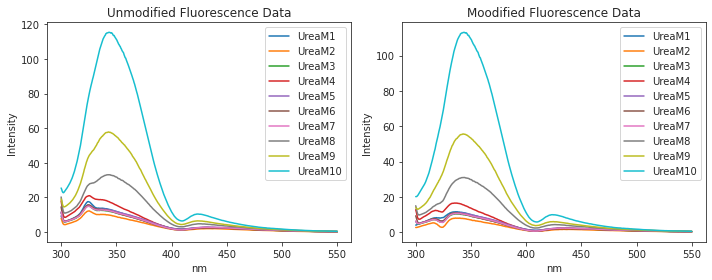

In [50]:
# Plot the unmodified and modified (Spectrum A - Spectrum B) spectra

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
new_raw_fluor.iloc[:, 2:12].plot(ax=ax1)
modified_fluor_spec.iloc[:, 2:12].plot(ax=ax2)
ax1.set_title('Unmodified Fluorescence Data')
ax1.set_ylabel('Intensity')
ax2.set_title('Moodified Fluorescence Data')
ax2.set_ylabel('Intensity')
plt.tight_layout()
centered('Figure 1. Comparison of Unmodified Spectrum & Modified Spectrum')

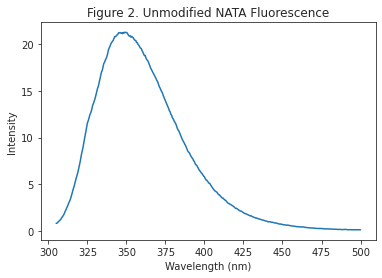

In [51]:
NATA_fluor.plot(legend=None)
plt.ylabel('Intensity')
plt.title('Figure 2. Unmodified NATA Fluorescence')
plt.show()

<h3 align="center"> Good Absorbance Data</h3> 

In [52]:
#Read in csv file and convert each columns to floats
abs_spectra = pd.read_csv('fret_abs.csv', index_col=0)
temp = abs_spectra.pop('kpi-water2')
abs_spectra.insert(1, 'kpi-water2', temp)
abs_spectra = abs_spectra.drop('NATA1', axis=1)

In [53]:
centered('Table 4. Absorbance Data')
abs_spectra.head()

,ureaNoCyt,kpi-water2,ureaM0,ureaM1,ureaM2,ureaM3,ureaM4,ureaM5,ureaM6,ureaM7,ureaM8,ureaM9,ureaM10
Wavelength (nm),,,,,,,,,,,,,
550,-0.074015,-0.015325,0.038644,0.053956,0.368988,0.473969,0.253100,0.403653,0.178318,0.169564,0.193685,0.235864,0.319591
549,-0.075183,-0.015427,0.038248,0.054246,0.367843,0.473129,0.253214,0.404829,0.178668,0.170122,0.193228,0.235937,0.319915
548,-0.075576,-0.016016,0.037605,0.053172,0.365282,0.473190,0.250552,0.403135,0.175158,0.168430,0.193759,0.236381,0.323015
547,-0.074827,-0.016122,0.038271,0.050625,0.361824,0.471665,0.246527,0.400469,0.173380,0.167097,0.193501,0.236677,0.323855
546,-0.074636,-0.015884,0.036392,0.048907,0.355824,0.470590,0.241886,0.398284,0.169742,0.164236,0.194583,0.237913,0.325875


In [54]:
NATA_abs = pd.read_csv('nata_abs.csv', header=0, skiprows=2)
NATA_abs.index = NATA_abs.pop('Wavelength (nm)')

print('Table 5. NATA Absorbabance Data')
NATA_abs.head()

Table 5. NATA Absorbabance Data


,Absorbance
Wavelength (nm),
600.0,-0.007131
599.0,-0.007131
598.0,-0.007131
597.0,-0.007131
596.0,-0.007131


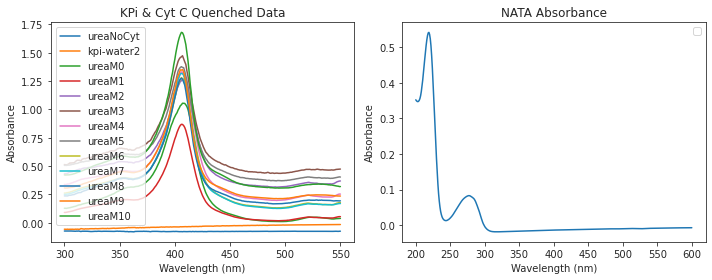

In [55]:
# Plot the unmodified and modified (Spectrum A - Spectrum B) spectra

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
abs_spectra.plot(ax=ax1)
NATA_abs.plot(ax=ax2)
ax1.set_title('KPi & Cyt C Quenched Data')
ax1.set_ylabel('Absorbance')
ax2.set_title('NATA Absorbance')
ax2.set_ylabel('Absorbance')
ax2.legend('')
plt.tight_layout()
centered('Figure 3. Comparison of Unmodified Spectrum & Modified Spectrum')

# Data Processing
Put here the core of the notebook. Feel free to further split this section into subsections.

### PART A: Measurement of the Unfolding Curve

In [56]:
# Fluoresence Df
    # modified_fluor_spec
    # NATA_fluor

# Absorbance Df
    # abs_spectra
    # NATA_abs

In [57]:
#Copy original spectrum and normalize it using concentration of cyt c
index = 2
normalized_spectra = modified_fluor_spec.copy()
for i in range(1, 12):
    # Find concentration of urea samples using A = εcl  =>  c = A/εL @580nm
    # ε(530 nm) = 11200 (M*cm)^-1
    conc_abs = abs_spectra.iloc[20, index]/(11200 * 1)

    # Divide spectra by concentration of cyt c present in solution
    normalized_spectra.iloc[:, i] = normalized_spectra.iloc[:, i]/float(conc_abs)
    
#Normalize the spectra with the absolute max intensity    
normalized_spectra.iloc[:, 1:12] = normalized_spectra.iloc[:, 1:12]/normalized_spectra.iloc[:, 1:12].max().max()

centered('Table 6. Normalized Spectrum')
normalized_spectra.iloc[:, 1:12].head()

,UreaM0,UreaM1,UreaM2,UreaM3,UreaM4,UreaM5,UreaM6,UreaM7,UreaM8,UreaM9,UreaM10
nm,,,,,,,,,,,
300.0,0.087771,0.035481,0.023363,0.053244,0.112158,0.053420,0.081597,0.055982,0.132120,0.122051,0.177786
300.5,0.079954,0.035728,0.023318,0.051062,0.102204,0.050356,0.072967,0.052034,0.121989,0.120223,0.177989
301.0,0.070123,0.037451,0.023601,0.047220,0.087877,0.047238,0.062174,0.047017,0.106867,0.117025,0.178766
301.5,0.062730,0.038917,0.024184,0.043545,0.075909,0.045047,0.053359,0.044058,0.095252,0.115391,0.181460
302.0,0.058658,0.039633,0.025218,0.041593,0.069134,0.044226,0.048050,0.042503,0.089352,0.114614,0.184922


In [58]:
# Find concentration of urea samples using A = εcl  =>  c = A/εL
# ε(280 nm) = 5630 (M*cm)^-1
flur_abs_280 = NATA_abs.iloc[-81, :]/(5630 * 1)

#Copy original spectrum and normalize it using concentration of cyt c
normalized_NATA = NATA_fluor.copy()
normalized_NATA = normalized_NATA/float(flur_abs_280)
normalized_NATA = normalized_NATA/normalized_NATA.max()
print('Table 7. Normalized NATA Spectrum')
normalized_NATA.head()

Table 7. Normalized NATA Spectrum


,Intensity
Wavelength (nm),
305.0,0.038187
305.5,0.039173
306.0,0.042696
306.5,0.047534
307.0,0.050446


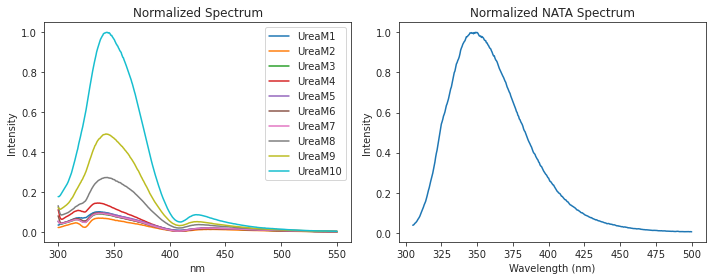

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
normalized_spectra.iloc[:, 2:12].plot(ax=ax1)
normalized_NATA.plot(ax=ax2, legend=None)
ax1.set_title('Normalized Spectrum')
ax1.set_ylabel('Intensity')
ax2.set_title('Normalized NATA Spectrum')
ax2.set_ylabel('Intensity')
plt.tight_layout()
centered('Figure 4. Comparison of Modified Spectrum & Normalized Spectrum')

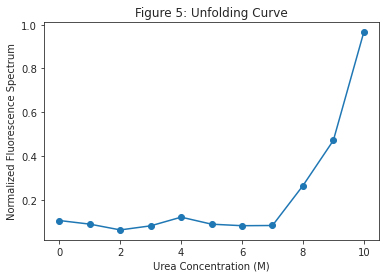

In [60]:
conc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
t = normalized_spectra.iloc[100, 1:12]

plt.plot(conc, t.values, '-o')
plt.title('Figure 5: Unfolding Curve')
plt.xlabel('Urea Concentration (M)')
plt.ylabel('Normalized Fluorescence Spectrum')
plt.show()

In [77]:
fit_coeff, fit_cov = np.polyfit(conc, t, 1, 
                                cov=True)
# Finding the standard error of each coefficient 
fit_err = np.sqrt(np.diag(fit_cov))

print(f"The slope is: {round(fit_coeff[0], 4)}, and the std. err. of the slope is: {round(fit_err[0], 4)}, with any-intercept of", round(fit_coeff[1], 4))

m = fit_coeff[0]

temp_num = np.log(0.5/ ( (1-0.5)*np.exp(fit_coeff[0]*5/(sp.constants.R*298)) ) )
Cm = temp_num/(-fit_coeff[0]*sp.constants.R*298)
G_H2O = fit_coeff[0]*Cm
G_unfolding = G_H2O - fit_coeff[0]*5

print("Calculated Cm =", Cm)
print('△G_H2O was calculated to be', round(G_H2O, 10), 'kJ/mol and the unfolding energy was calculated to be', round(G_unfolding, 3), 'kJ/mol.')

The slope is: 0.0582, and the std. err. of the slope is: 0.0198, with any-intercept of -0.0724
Calculated Cm = 8.144587737074497e-07
△G_H2O was calculated to be 4.74e-08 kJ/mol and the unfolding energy was calculated to be -0.291 kJ/mol.


### Part B: Determination of the Förster Distance

In [62]:
from scipy.integrate import quad
from scipy import integrate
from scipy import interpolate

lambda_vals = np.linspace(300*(10**-9), 500*(10**-9), 391)

# Interpolate the NATA_abs and NATA_fluor data to create the function
NATA_abs_func = interpolate.interp1d(lambda_vals, NATA_abs.iloc[:391, 0])
NATA_fluor_func = interpolate.interp1d(lambda_vals, NATA_fluor.iloc[:, 0])

# Integrate NATA_abs * NATA_fluor * lambda^4
def mult_spectra(lambda_val):
    return NATA_abs_func(lambda_val) * NATA_fluor_func(lambda_val) * lambda_val**4


# Perform the integration using scipy.integrate.quad
J_DA, error = integrate.quad(mult_spectra, 300*(10**-9), 500*(10**-9))

# Print the result
print('J_DA is the overlap integral of the donor emission spectrum and the acceptor', 
      'absorption spectrum which was calculated to be', J_DA)

J_DA is the overlap integral of the donor emission spectrum and the acceptor absorption spectrum which was calculated to be -1.989033401200128e-34


In [63]:
#uSING EQ. 2, to find R_0

const = 8.79e23
k = 2/3
n = 1.4**(-4)
phi_D = 0.13
root = 1/6

### NOTE, I PUT AN ABSOLUTE VALUE BECAUSE IT WAS A NEGATIVE NUMBER
R_0 = np.power( abs((const*k*n*phi_D*J_DA)), root )
print('The Förster distance, R_0, angostroms is the critical distance to allow 50% of energy to be trasnferred from Trp-59 (donor) to the heme cofactor (acceptor) which was calculated to be', R_0)

The Förster distance, R_0, angostroms is the critical distance to allow 50% of energy to be trasnferred from Trp-59 (donor) to the heme cofactor (acceptor) which was calculated to be 0.012569803357746736


### Part C: Calculation of Intramolecular Distances for Unfolded Structures

In [64]:
r = np.linspace(0.03, 0.001, 51)
E = []
a = []
R_0_raised_6 = R_0**6
for index in range(len(r)):
    num = R_0_raised_6
    denom = (R_0_raised_6 + r[index]**6)
    temp = num/denom
    E.append( temp )

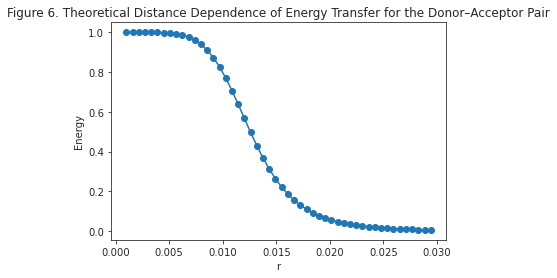

In [65]:
plt.plot(r[1:], E[1:], '-o')
plt.xlabel('r')
plt.ylabel('Energy')
plt.title('Figure 6. Theoretical Distance Dependence of Energy Transfer for the Donor–Acceptor Pair')
plt.show()

In [75]:
E_0M = 1 - (normalized_spectra.iloc[100, 1]/normalized_spectra.iloc[100, 11])

r_cal = (1/E_0M)*R_0_raised_6 - R_0_raised_6
print('The distance between Trp-59 and the heme group for the fully folded protein (0.0 m urea) is', round(r_cal/1e-10, 5), 'Å.')

The distance between Trp-59 and the heme group for the fully folded protein (0.0 m urea) is 0.00479 Å.


# Results
As expected in Figure 1, the fluorescence intensity increased as the molarity of the denaturant urea decreased which showed that urea was unfolding the protein causing Trp-59 (donor) to move away and transfer its energy to the heme cofactor (acceptor). Figure 5 showed an unfolding curve that indicated that there was an exponential behavior where as increasing the urea concentration @ 580 nm the normalized fluorescence intensity also increased. While there was a small standard error with the graph, it was not the expected graph. The expected graph should be sigmoidal due to the sigmoidal nature of protein folding having two states at different ends: an unfolding state and a folding state. $\Delta G_{U}$ was calculated to be -0.291 kJ/mol with $C_m$ and m calculated to be 8.1445e-7 and 0.0582 respectively. These values are not consistent with literature, but errors with respect to how these values were calculated are given in the discussion. The Förster distance, $R_0$, was calculated to be 0.0126 Å with a $J_{DA}$ of -1.99e-34 $cm^3/M$. Figure 6 showed a clear sigmoidal behavior from r=0.001 to r=0.03 indicating the energy transfer efficiency occurs within a small interval. The calculated distance of the Trp-59 and the heme group was 0.00479 Å. 

# Discussion

Figure 1 confirmed that as the distance between Trp-59 and the heme cofactor increased (unfolding of protein) as fluorescence intensity increases. This was expected because urea is a known denaturant so as cyt c unfolds, the natural fluorphore Trp-59 will fluoresce more and more and quenching will decrease. In Figure 4, the spectra consisting of urea and the NATA spectrum were normalized for protein concentration. This was very important in determining the distance between Trp-59 and the heme group as a function of denaturant concentration as well as to build an unfolding curve. When observing the calculated $\Delta G_{U}$, it can clearly be seen that something was wrong due to the energy being negative. Most of the literature values that provide the unfolding energy is spontaneous. The calculated $\Delta G_{U}$ indicates that unfolding is spontaneous. This should not be the case because this would mean the protein would not fold naturally due to unstable interactions that prevent the cyt c from folding. Since it is known that cyt c has a natural state of being folded, it is very clear that some error occurred. The error can also be seen with respect to $C_m$ which is defined as the midpoint concentration between folding and unfolding of cyt c. The midpoint concentration is incredibly low to the point that it can be hypothesized that the value of $C_m$ is probably decreasing the value of $\Delta G_{U}$. Most likely, there was an error in measuring the spectra, but there also could be errors within the calculations. The Förster distance, $R_0$, is the critical distance to allow 50% of energy to be transferred from Trp-59 (donor) to the heme cofactor (acceptor), and it was calculated to be 0.0126 Å. This value seems to be too small of a value to be the Förster distance which means another error had occurred. One error explanation can come from the integration of J_DA which is the overlap integral of the donor emission spectrum and the acceptor absorption spectrum. The integral value of $J_DA$ was such a small value that it can be confirmed that $R_0$ is skewed to a smaller value due to the integration, $J_DA$. In Figure 6, the Förster distance was used to determine the energy transfer efficiency with respect to simulated radii, but due to errors in the calculation of the Förster distance, the radius is within too small of a region. Figure 6 should show a sigmoidal behavior from around 0Å to 50Å. According to the Protein Data Base, the distance of the Trp-59 and the heme group in the folded state is 58.4 Å, but the calculated distance of the Trp-59 and the heme group for the fully folded state was calculated to be 0.00479 Å. This indicates the same trend of calculated values being too small. The calculated value of the distance of the Trp-59 and the heme group should be significantly larger.

## Conclusion
FRET was used as a spectroscopic technique to determine the intermolecular and intramolecular distances using the theory that there is radiationless energy transfer between an excited-state donor and a ground-state acceptor. Important variables calculated from FRET analysis of cyt c was the Förster distance, the overlap integral ($J_{DA}$), energy transfer efficiency, and energy of unfolding. This would not have happened without the normalized spectrum and absorbance spectrum showcasing the proof of concept that the denaturant urea unfolds cyt c. The data gathered from analyzing fluorescence and absorption spectrum of cyt c demonstrate how perfect cyt c can be in FRET analysis, because the  fluorophore at position 59 (Trp-59) was characterized well acting as the FRET donor interacting with the heme cofactor acceptor transferring its energy. In this paper, cyt c was validated as an effective protein to determine many biophysical properties of the folding and unfolding proteins. It is believed that cyt c should be considered a standard for FRET analysis due to its well-behaved properties. While cyt c performed well, the hope for the future is to find more proteins like cyt c that can be well explained for biophysical analysis.